# GTEX Gene Expression Analysis

In [74]:
%matplotlib inline

In [77]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
GTEX = '/cellar/users/agross/Data/DiffExp/GTEX/'

In [61]:
GTEX_WEB = 'http://gtexportal.org/static/datasets/gtex_analysis_v4/'
files = [('annotations/GTEx_Data_V4_Annotations_SampleAttributesDS.txt', 
          'SampleAttributes.txt'),
         ('annotations/GTEx_Data_V4_Annotations_SubjectPhenotypes_DS.txt', 
          'SubjectPhenotypes.txt'),
         ('rna_seq_data/GTEx_Analysis_V4_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm.gct.gz',
          'rna_gene_rpkm.gct.gz')]

In [64]:
def download_files():
    for f in files:
        source = GTEX_WEB + f[0]
        target = GTEX + f[1]
        !curl $source -o $target
    f = GTEX + files[2][1]
    !gunzip $f
d = os.listdir(GTEX)
if (files[0][1] in d) & (files[1][1] in d) & (files[2][1][:-3] in d):
    print 'Using downloaded files...'
else:
    print 'Downloading GTEX files'
    download_files()

Using downloaded files...


In [54]:
meta = pd.read_table(GTEX + 'SampleAttributes.txt',
                     index_col=0)
gtex_pat = pd.read_table(GTEX + 'SubjectPhenotypes.txt',
                     index_col=0)
gtex = pd.read_table(GTEX + 'rna_gene_rpkm.gct', skiprows=2, index_col=[0,1])
gtex.index = gtex.index.get_level_values(1)

In [ ]:
tissue_type = meta['SMTSD']

In [84]:
def plot_tissues_across_gene(gene, log=True):
    fig, ax = plt.subplots(figsize=(10,15))
    if log:
        v = np.log2(gtex.ix[gene]).dropna().clip_lower(-4)
    else:
        v = gtex.ix[gene].dropna()
    sns.violinplot(v, groupby=tissue_type, 
                   cut=.1, inner = 'points', ax=ax, vert=False)

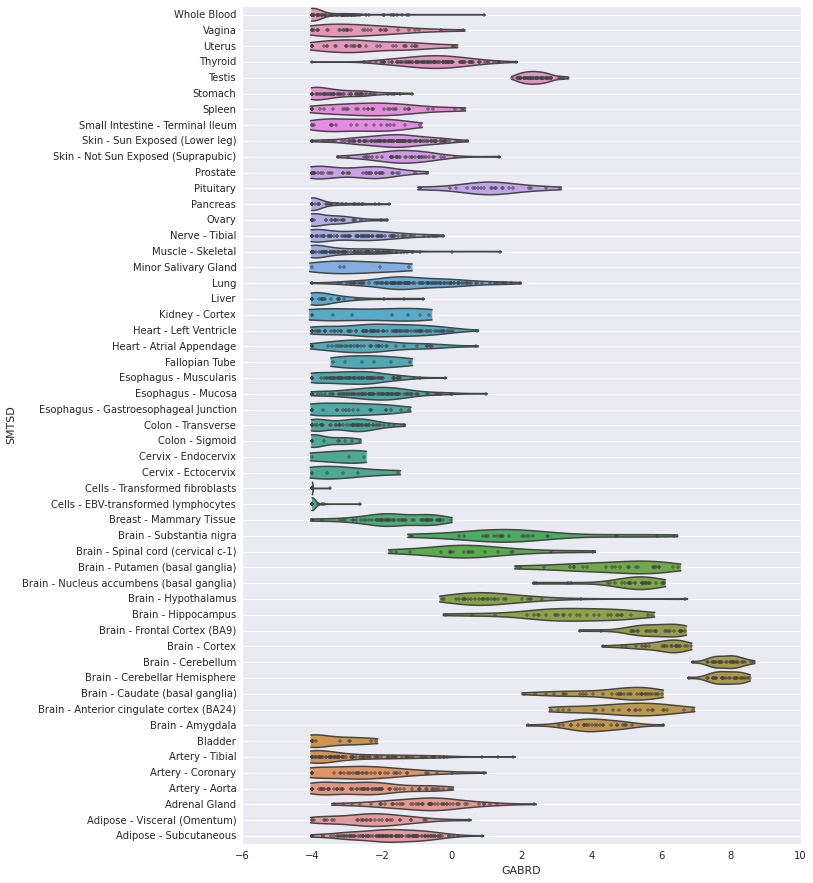

In [88]:
#Do not import
plot_tissues_across_gene('GABRD', log=True)